# Group 6018 Project Report




### Table of contents: 
1. Introduction
2. Data Wrangling
3. Exploratry Data Analysis
4. Analysis


## **1. Introduction**

In recent years more and more people have started to pay more attention in conserving the environment especially air pollution. There are many environmental aspects that affect air pollution and we choose specifically to look at the relationship between temperature and pollutants. Our data looks at how the temperature of an Italian city affects 5 main categories of air pollutants: Non Methane Hydrocarbons, Nitrogen Oxides,Carbon Oxides, Benzene, and Nitrogen Dioxides. Given the raw data collected is in fixed intervals of time, and can be categorized in day, the topic of interest will how the relationship between time and level of pollution. Specifically, how different time in each day will affect the level pollution. 



## **2. Data Wrangling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling



df= (pd.read_csv("../../data/processed/AirQualityUCI.csv")
     .drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','Unnamed: 15','Unnamed: 16','RH','AH'])     
     .dropna()
     .rename(columns={"NMHC(GT)": "Nonmethane Hydrocarbons", "C6H6(GT)": "Benzene", "NOx(GT)": "Nitrogen Oxides", "NO2(GT)": "Nitrogen Dioxide"})
    )

df.drop(df.index[df['CO(GT)'] == -200], inplace = True)
df.drop(df.index[df['Nonmethane Hydrocarbons'] == -200], inplace = True)
df.drop(df.index[df['Benzene'] == -200], inplace = True)
df.drop(df.index[df['Nitrogen Oxides'] == -200], inplace = True)
df.drop(df.index[df['Nitrogen Dioxide'] == -200], inplace = True)
df.drop(df.index[df['T'] == -200], inplace = True)

df.head()

,Date,Time,CO(GT),Nonmethane Hydrocarbons,Benzene,Nitrogen Oxides,Nitrogen Dioxide,T
0,2004-03-10,18:00:00,2.6,150.0,11.9,166.0,113.0,13.6
1,2004-03-10,19:00:00,2.0,112.0,9.4,103.0,92.0,13.3
2,2004-03-10,20:00:00,2.2,88.0,9.0,131.0,114.0,11.9
3,2004-03-10,21:00:00,2.2,80.0,9.2,172.0,122.0,11.0
4,2004-03-10,22:00:00,1.6,51.0,6.5,131.0,116.0,11.2


### Data Description：
After modification, the dataset was reduce to 8 columns, the columns of interest are CO, Nonmethane Hydrocarbons, Nitrogen Oxides, and Nitrogen Dioxide. These 5 substances make up the main portion of air pollution, and their concentration is presented in part per million (PPM). The sensor which detects these substances are automatically set to collect data every hour, hence toward the left side of the table we can see the day and time of each reading. 

## **3. EDA**

After discussion with our team, it is realized temperature is more direct and impactful factor than time relative to air pollution. Since time of the day also directly influence the temperature (days are generally warm and nights are colder). We decided to amend our research question to **how does temperature effect different types of air pollution?**

### 3.1.1 CO(GT) with Temperatures Plots

Text(27.0, 0.5, 'CO(GT) (PPM)')

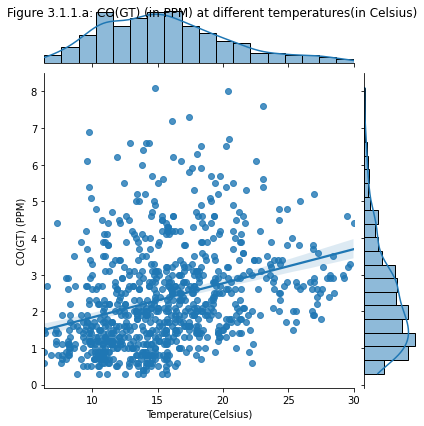

In [22]:
#Jointplot
co = sns.jointplot(x='T', y='CO(GT)', data=df, kind='reg')
co.fig.suptitle("Figure 3.1.1.a: CO(GT) (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("CO(GT) (PPM)")

Text(0.5, 1.0, 'Figure 3.1.1.b: CO(GT) (in PPM) at different temperatures(in Celsius)')

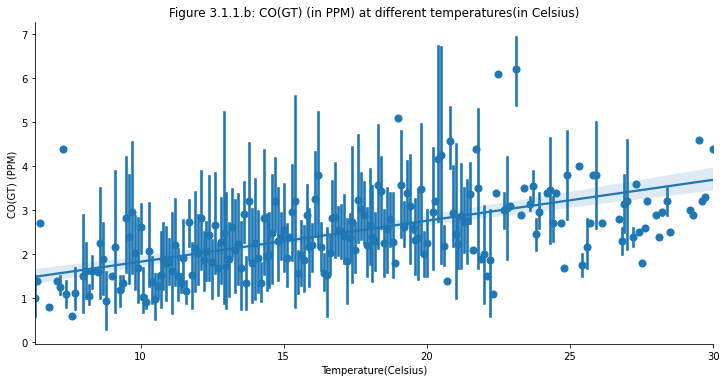

In [23]:
sns.lmplot(x="T", y="CO(GT)",  data=df, x_estimator=np.mean,aspect=2)
plt.ylabel("CO(GT) (PPM)")
plt.xlabel("Temperature(Celsius)")
plt.title("Figure 3.1.1.b: CO(GT) (in PPM) at different temperatures(in Celsius)")

Text(0.5, 1.0, 'Figure 3.1.1.c: CO(GT) (in PPM) at different temperatures(in Celsius)')

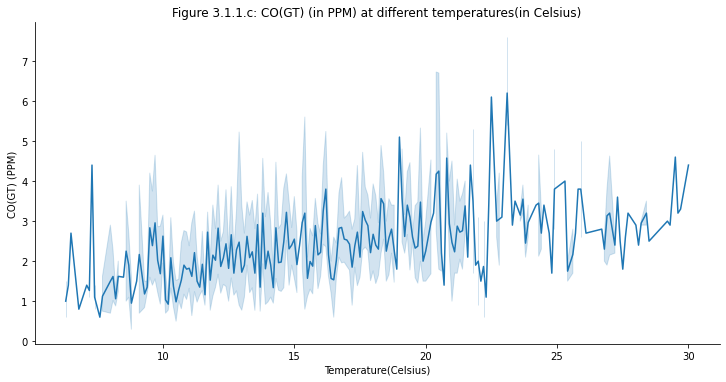

In [24]:
sns.relplot(x="T", y="CO(GT)", kind="line", data=df,aspect=2)
plt.ylabel("CO(GT) (PPM)")
plt.xlabel("Temperature(Celsius)")
plt.title("Figure 3.1.1.c: CO(GT) (in PPM) at different temperatures(in Celsius)")

### 3.1.2 CO(GT) Analysis

First, we want to find the relationship between CO emission and temperature, after using scatter plot between CO emission and temperature. We can predict that that lower temperature likely result in lower CO emission. 

### 3.2.1 Nonmethane Hydrocarbons with Temperatures Plots

Text(27.0, 0.5, 'Nonmethane Hydrocarbons (PPM)')

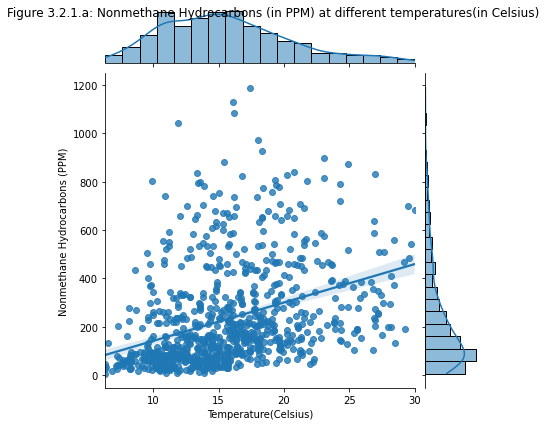

In [30]:
nh = sns.jointplot(x='T', y='Nonmethane Hydrocarbons', data=df, kind='reg')
nh.fig.suptitle("Figure 3.2.1.a: Nonmethane Hydrocarbons (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nonmethane Hydrocarbons (PPM)")

Text(0.5, 1.0, 'Figure 3.2.1.b: Nonmethane Hydrocarbons (in PPM) at different temperatures(in Celsius)')

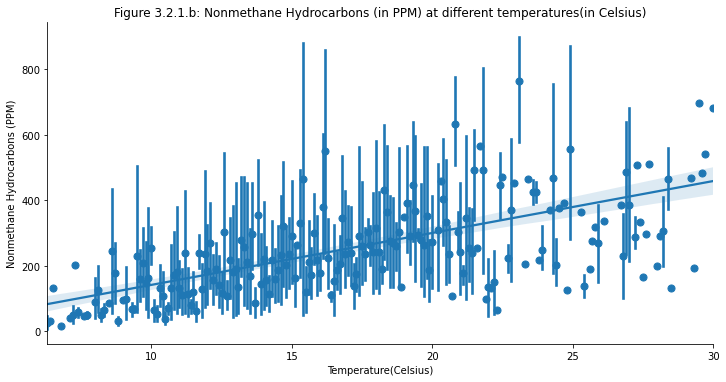

In [29]:
sns.lmplot(x="T", y="Nonmethane Hydrocarbons", data=df, x_estimator=np.mean,aspect=2)
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nonmethane Hydrocarbons (PPM)")
plt.title("Figure 3.2.1.b: Nonmethane Hydrocarbons (in PPM) at different temperatures(in Celsius)")

Text(0.5, 1.0, 'Figure 3.2.1.c: Nonmethane Hydrocarbons (in PPM) at different temperatures(in Celsius)')

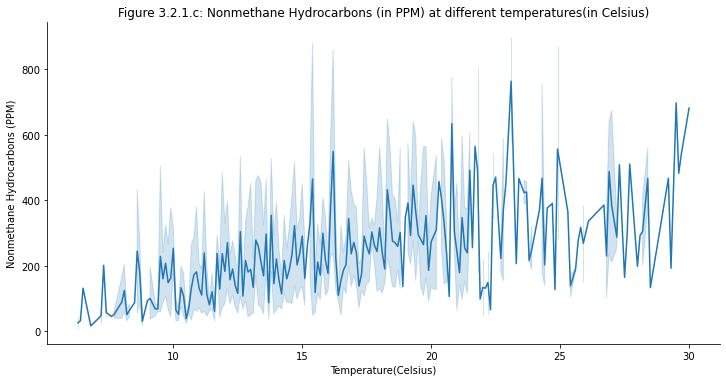

In [28]:
sns.relplot(x="T", y="Nonmethane Hydrocarbons",kind="line", data=df,aspect=2)
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nonmethane Hydrocarbons (PPM)")
plt.title("Figure 3.2.1.c: Nonmethane Hydrocarbons (in PPM) at different temperatures(in Celsius)")

### 3.2.2 Nonmethane Hydrocarbons Analysis

Now we attempt to find the relationship between Nonmethane Hydrocarbons and temperature, based on the scatter line, temperature seems to have impact on Nonmethane Hydrocarbons emision: the higher the temperature, the higher the amount of Nonmethane Hydrocarbons.

### 3.3.1 Benzene with Temperatures Plots

Text(27.0, 0.5, 'Benzene (PPM)')

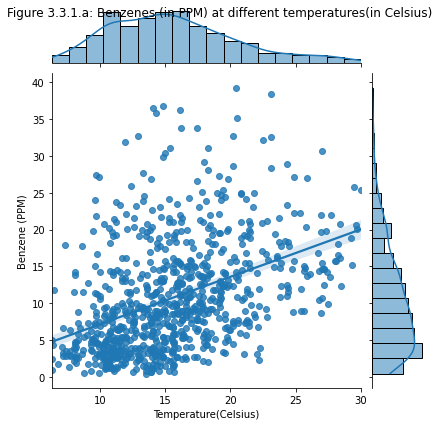

In [31]:
b = sns.jointplot(x='T', y='Benzene', data=df, kind='reg')
b.fig.suptitle("Figure 3.3.1.a: Benzenes (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Benzene (PPM)")

Text(0.5, 1.0, 'Figure 3.3.1.b: Benzenes (in PPM) at different temperatures(in Celsius)')

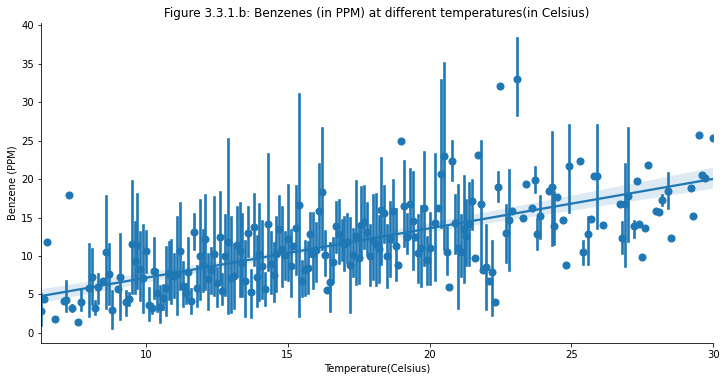

In [32]:
sns.lmplot(x="T", y="Benzene", data=df, x_estimator=np.mean,aspect=2) 
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Benzene (PPM)")
plt.title("Figure 3.3.1.b: Benzenes (in PPM) at different temperatures(in Celsius)")

Text(0.5, 1.0, 'Figure 3.3.1.c: Benzenes (in PPM) at different temperatures(in Celsius)')

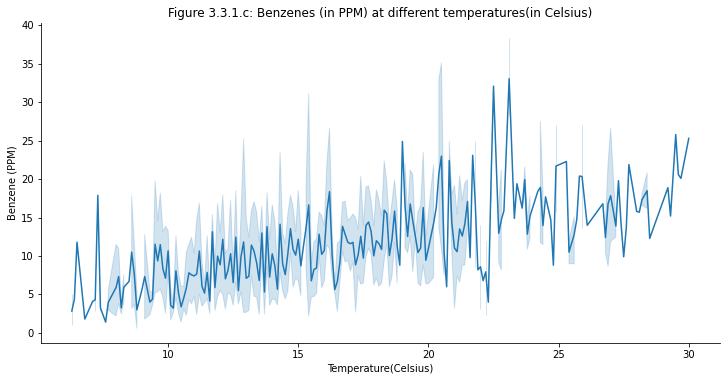

In [33]:
sns.relplot(x="T", y="Benzene", kind="line", data=df,aspect=2)
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Benzene (PPM)")
plt.title("Figure 3.3.1.c: Benzenes (in PPM) at different temperatures(in Celsius)")

### 3.3.2 Benzene Analysis

Looking at the figure above, clearly temperature has a significant impact on Benzene emission, based on the data in the dataset, it seems that emission of benzene is high at high temperature.  

### 3.4.1 Nitrogen Oxides with Temperatures Plots

Text(27.0, 0.5, 'Nitrogen Oxides (PPM)')

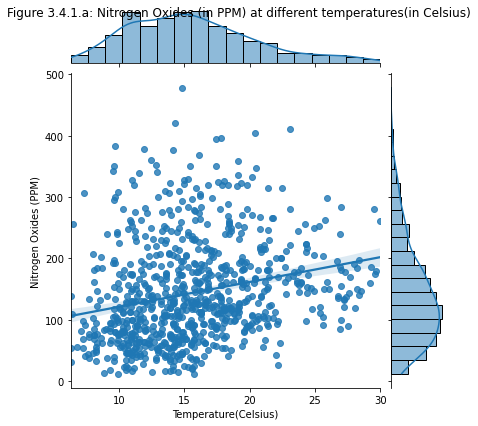

In [34]:
no = sns.jointplot(x='T', y='Nitrogen Oxides', data=df, kind='reg')
no.fig.suptitle("Figure 3.4.1.a: Nitrogen Oxides (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Oxides (PPM)")

Text(0.5, 1.0, 'Figure 3.4.1.b: Nitrogen Oxides (in PPM) at different temperatures(in Celsius)')

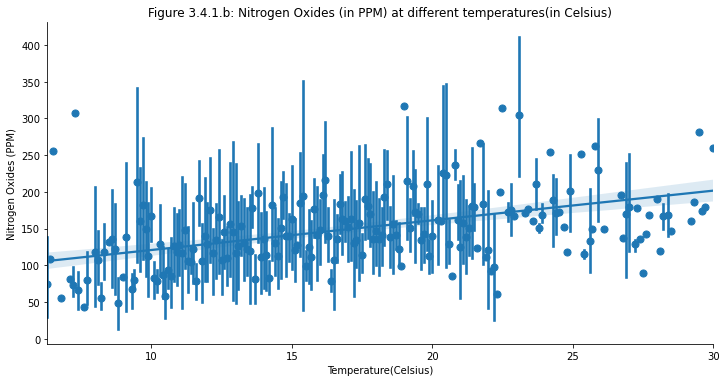

In [35]:
sns.lmplot(x="T", y="Nitrogen Oxides", data=df, x_estimator=np.mean,aspect=2)
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Oxides (PPM)")
plt.title("Figure 3.4.1.b: Nitrogen Oxides (in PPM) at different temperatures(in Celsius)")

Text(0.5, 1.0, 'Figure 3.4.1.c: Nitrogen Oxides (in PPM) at different temperatures(in Celsius)')

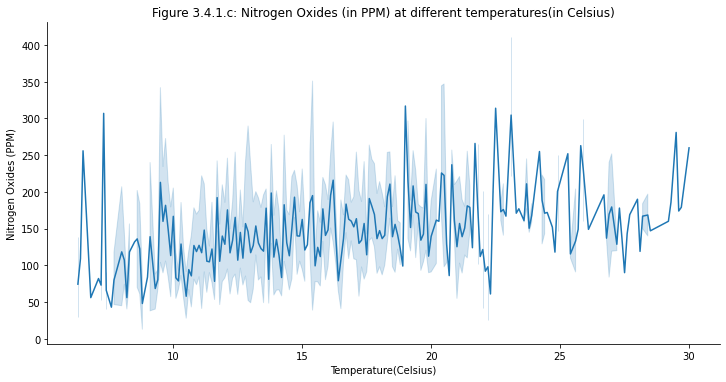

In [36]:
sns.relplot(x="T", y="Nitrogen Oxides",kind="line", data=df,aspect=2)
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Oxides (PPM)")
plt.title("Figure 3.4.1.c: Nitrogen Oxides (in PPM) at different temperatures(in Celsius)")

### 3.4.2 Nitrogen Oxides Analysis

Figure above shows the relationship between Nitrogen Oxide (N0x) and temperature, similar to carbon monoxide, it seems higher temperature result in lower emission.

### 3.5.1 Nitrogen Dioxide with Temperatures Plots

Text(27.0, 0.5, 'Nitrogen Dioxide (PPM)')

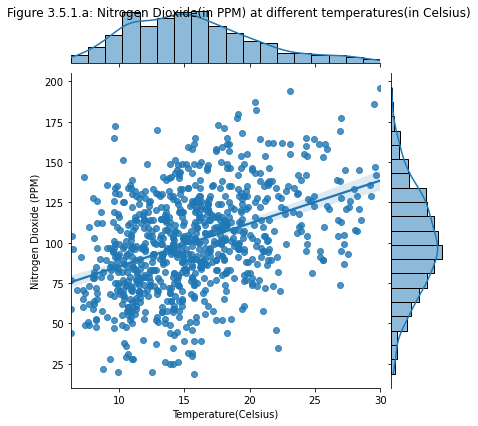

In [39]:
nd = sns.jointplot(x='T', y='Nitrogen Dioxide', data=df, kind='reg')
nd.fig.suptitle("Figure 3.5.1.a: Nitrogen Dioxide(in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Dioxide (PPM)")

Text(0.5, 1.0, 'Figure 3.5.1.b: Nitrogen Dioxide(in PPM) at different temperatures(in Celsius)')

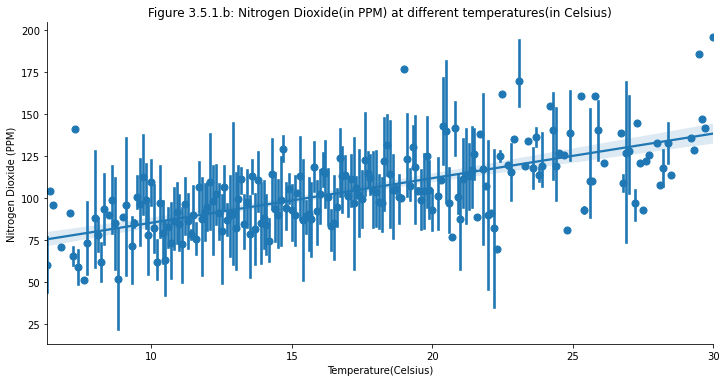

In [40]:
sns.lmplot(x="T", y="Nitrogen Dioxide", data=df, x_estimator=np.mean,aspect=2)
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Dioxide (PPM)")
plt.title("Figure 3.5.1.b: Nitrogen Dioxide(in PPM) at different temperatures(in Celsius)")

Text(0.5, 1.0, 'Figure 3.5.1.c: Nitrogen Dioxide(in PPM) at different temperatures(in Celsius)')

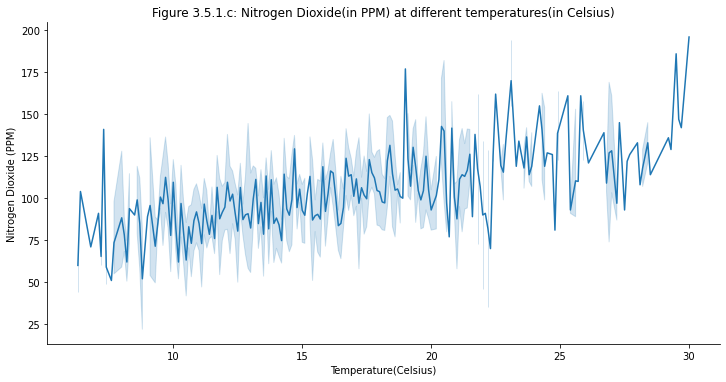

In [41]:
sns.relplot(x="T", y="Nitrogen Dioxide",kind="line", data=df,aspect=2)
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Dioxide (PPM)")
plt.title("Figure 3.5.1.c: Nitrogen Dioxide(in PPM) at different temperatures(in Celsius)")

### 3.5.2 Nitrogen Dioxide Analysis

As we expected, Nitrogen Dioxide emission behaves similar with Nitro Oxides, where emission is lowered when temperature is low.

### 3.6 Summary Plots

Text(0.5, 0.98, 'Figure 3.6.a: Relationship between five pollutants(in PPM) and temperatures(in Celsius)')

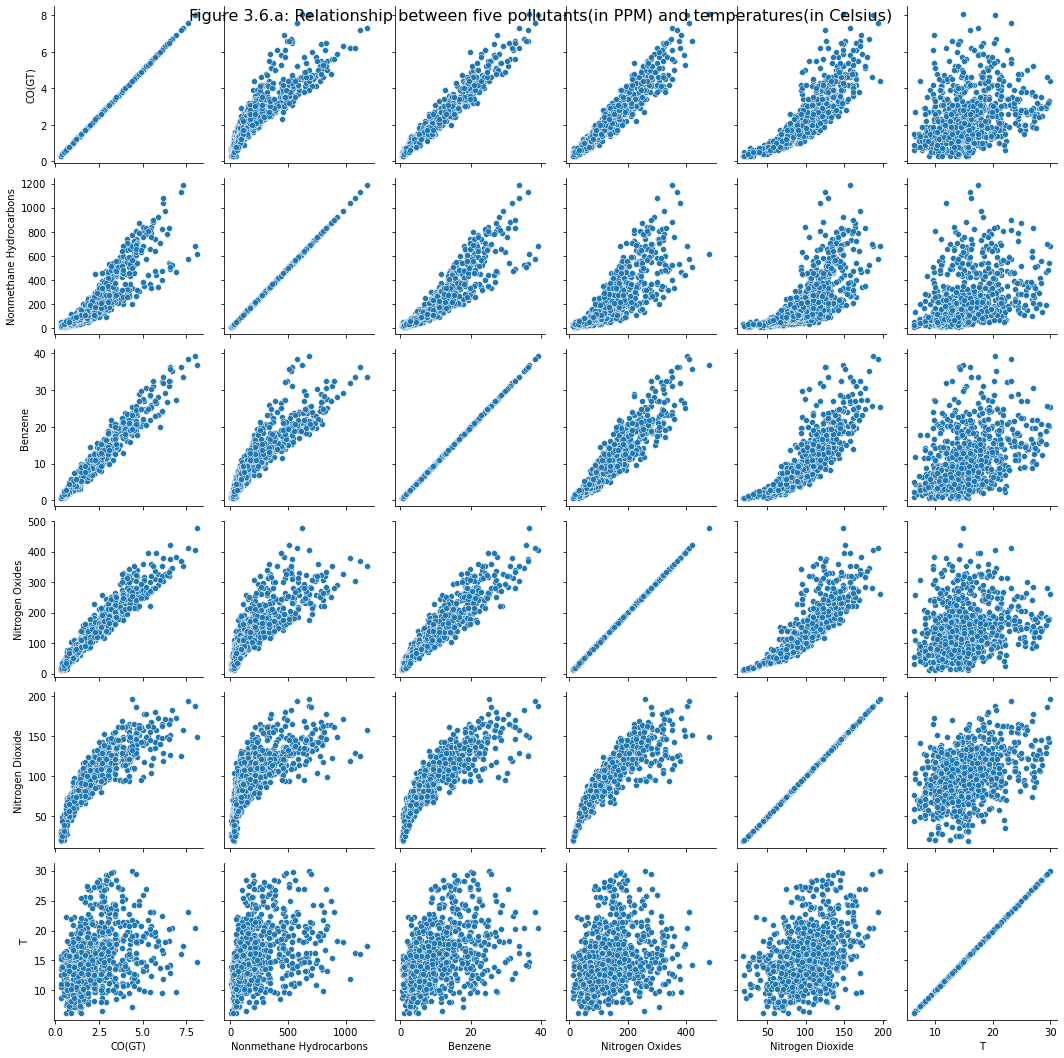

In [58]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)
g.fig.suptitle("Figure 3.6.a: Relationship between five pollutants(in PPM) and temperatures(in Celsius)",fontsize=16)

Text(0.5, 0.98, 'Figure 3.6.b: Scatter plots for five pollutants(in PPM) at different temperatures(in Celsius)')

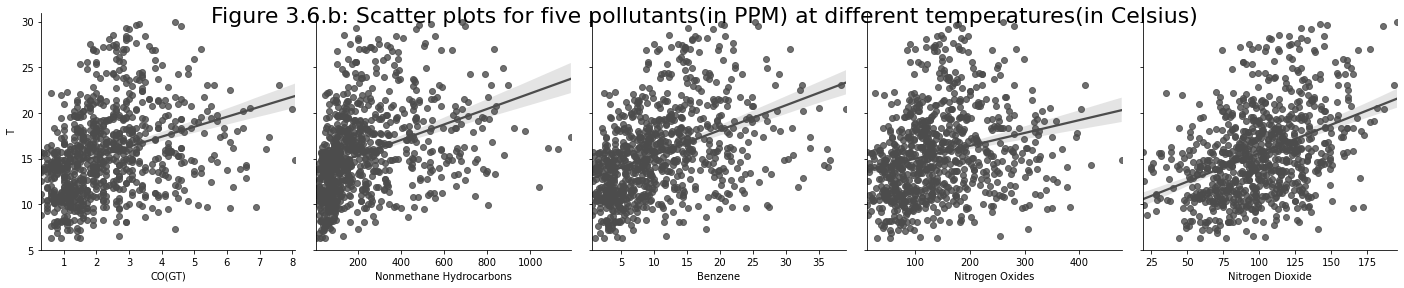

In [56]:
g = sns.PairGrid(df, y_vars=["T"], x_vars=["CO(GT)", "Nonmethane Hydrocarbons","Benzene","Nitrogen Oxides","Nitrogen Dioxide"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(5, 31))
g.fig.suptitle("Figure 3.6.b: Scatter plots for five pollutants(in PPM) at different temperatures(in Celsius)",fontsize=22)

## **4. Analysis**

After amendment was made to our topic of interest, the goal of this project was to determine to the relationship between temperature and the concentration of each air pollutant, and we have chosen temperature to be our reference. To be able to determine the relationship, we would require visualization of data that clearly demonstrate the cause and effect from changes in temperature and the responding changes in pollutant concentraiton. 

Hence, during our EDA, we presented with data that mainly focus on trend line and scatter plot figure, to emphasis on change of air pollutant concentration over a intervel of change in temperature. With trend line aded, one is able to clearly see thr relationship between the two factor.

For exmaple, looking at Figure 3.4.1.a, it is clear that in general, based on the data collected, when temperature increase, the concentration of Nitrogen Oxides also increase. However, this trend does not continue indefinitely. Looking at Figure 3.6.b, one can see that although higher concentration of air pollution is detected at higher temperatures, but less reading sare made at high concentrations of pollutants. 


Our research question is: 
### **How does temperature affect the emission of various pollutants?** 

Before various relationship between temperature and pollutants are visualized, our group assumed that temperature likely will be in the similiar manner. Based on the data collected, that seems to be true, although the degree of infuence is slightly different between each pollutans, but all of them follow the similiar trend.


Looking the final visualization in section 3.6, one can see that relative the local temperature in Italy, increase in temperature generally is accompanied by an increase in air polution, in terms of Carbon Oxides, Nonmethane Hydrocarbons, Benzene, Nitrogen Oxides, and Nitrogen Dioxides.	